In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# read data
x = np.loadtxt('data.dat')[:,0]
y = np.loadtxt('data.dat')[:,1]

# calculate summations
x2  = sum(x**2.0)
x4  = sum(x**4.0)
x6  = sum(x**6.0)
x3y = sum(x**3.0*y)
xy  = sum(x*y)

# evaluate answer with direct method
det   = x6*x2 - x4*x4
beta1 = (+x2*x3y - x4*xy)/det 
beta2 = (-x4*x3y + x6*xy)/det 

# show answer
print("answer: ", beta1, beta2)

answer:  1.0875931972372848 -2.8951878661621615


In [2]:
# set condition for iterative method
tb1 = 0.0
tb2 = 0.0
alpha = 1.0e-4
numStep = 1000

# set array for beta1, beta2 trajectory
trj_b1 = np.array([])
trj_b2 = np.array([])

# compute gradient descent
for i in range(numStep):
    trj_b1 = np.append(trj_b1, tb1)
    trj_b2 = np.append(trj_b2, tb2)

    d_b1 = -2.0*(x3y - tb1*x6 - tb2*x4)
    d_b2 = -2.0*(xy  - tb1*x4 - tb2*x2)

    tb1 -= alpha*d_b1
    tb2 -= alpha*d_b2
    
    print("step %i - (%f, %f)" % (i, tb1, tb2))

step 0 - (0.184115, 0.021458)
step 1 - (0.320478, 0.036846)
step 2 - (0.421490, 0.047739)
step 3 - (0.496333, 0.055306)
step 4 - (0.551802, 0.060411)
step 5 - (0.592929, 0.063694)
step 6 - (0.623438, 0.065628)
step 7 - (0.646087, 0.066563)
step 8 - (0.662917, 0.066760)
step 9 - (0.675439, 0.066411)
step 10 - (0.684772, 0.065657)
step 11 - (0.691745, 0.064604)
step 12 - (0.696969, 0.063330)
step 13 - (0.700899, 0.061893)
step 14 - (0.703872, 0.060335)
step 15 - (0.706135, 0.058688)
step 16 - (0.707873, 0.056976)
step 17 - (0.709223, 0.055216)
step 18 - (0.710284, 0.053420)
step 19 - (0.711133, 0.051599)
step 20 - (0.711824, 0.049758)
step 21 - (0.712397, 0.047904)
step 22 - (0.712885, 0.046040)
step 23 - (0.713308, 0.044170)
step 24 - (0.713684, 0.042294)
step 25 - (0.714024, 0.040416)
step 26 - (0.714338, 0.038535)
step 27 - (0.714633, 0.036653)
step 28 - (0.714914, 0.034770)
step 29 - (0.715184, 0.032887)
step 30 - (0.715446, 0.031005)
step 31 - (0.715702, 0.029123)
step 32 - (0.71595

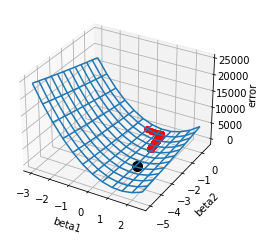

In [3]:
# function to evaluate error
def error(B1, B2):
    E = sum(y*y) + B1**2.0*x6 + B2**2.0*x2 \
        - 2.0*B1*x3y - 2.0*B2*xy + 2.0*B1*B2*x4
    return E

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

B1 = np.arange(-3, 3, 0.5)
B2 = np.arange(-5, 1, 0.5)
B1, B2 = np.meshgrid(B1, B2)
E = error(B1, B2)

# Plot the surface.
ax.scatter(beta1, beta2, error(beta1, beta2), c='black', s=100)
ax.plot_wireframe(B1, B2, E)
ax.plot(trj_b1, trj_b2, error(trj_b1, trj_b2), 'ro')

ax.set_xlabel('beta1')
ax.set_ylabel('beta2')
ax.set_zlabel('error')

plt.show()